
# Dataset: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients



In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Variables
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
df1 = pd.read_csv('/content/UCI_Credit_Card.csv', delimiter=',')
df1.dataframeName = 'UCI_Credit_Card.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [3]:
defaulters = df1.copy()
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
defaulters.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [6]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [7]:
defaulters.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

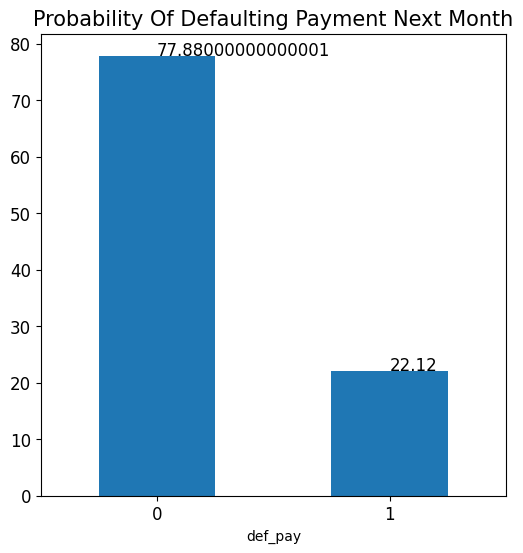

In [8]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

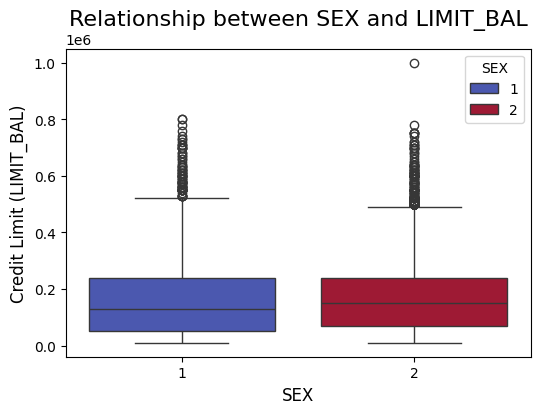

In [9]:
plt.figure(figsize=(6, 4))

# Plot the relationship using seaborn
sns.boxplot(data=defaulters, x='SEX', y='LIMIT_BAL', hue='SEX', palette='coolwarm')

# Set the plot title and axis labels
plt.title('Relationship between SEX and LIMIT_BAL', fontsize=16)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=12)

# Display the plot
plt.show()

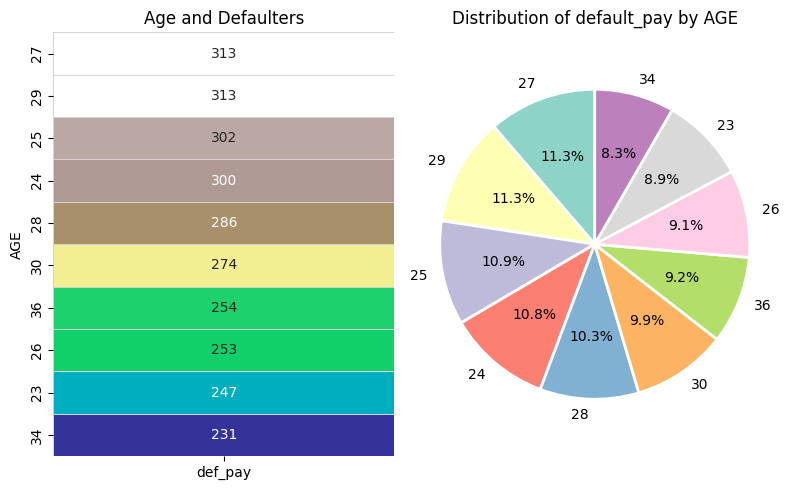

In [10]:
education = defaulters[['AGE', 'def_pay']].groupby(['AGE'], axis=0).sum().sort_values('def_pay', ascending=False)[:10]

palette = "Set3"

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot heatmap on the left subplot
axes[0].set_title('Age and Defaulters')
sns.heatmap(education, annot=True, fmt='d', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', ax=axes[0])

# Plot pie chart on the right subplot
axes[1].set_title("Distribution of default_pay by AGE")
axes[1].pie(education["def_pay"], labels=education.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(palette), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
axes[1].axis("equal")  # Ensure the pie is drawn as a circle

plt.tight_layout()
plt.show()

In [11]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3524
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 24
[LightGBM] [Info] Start training from score 0.221200


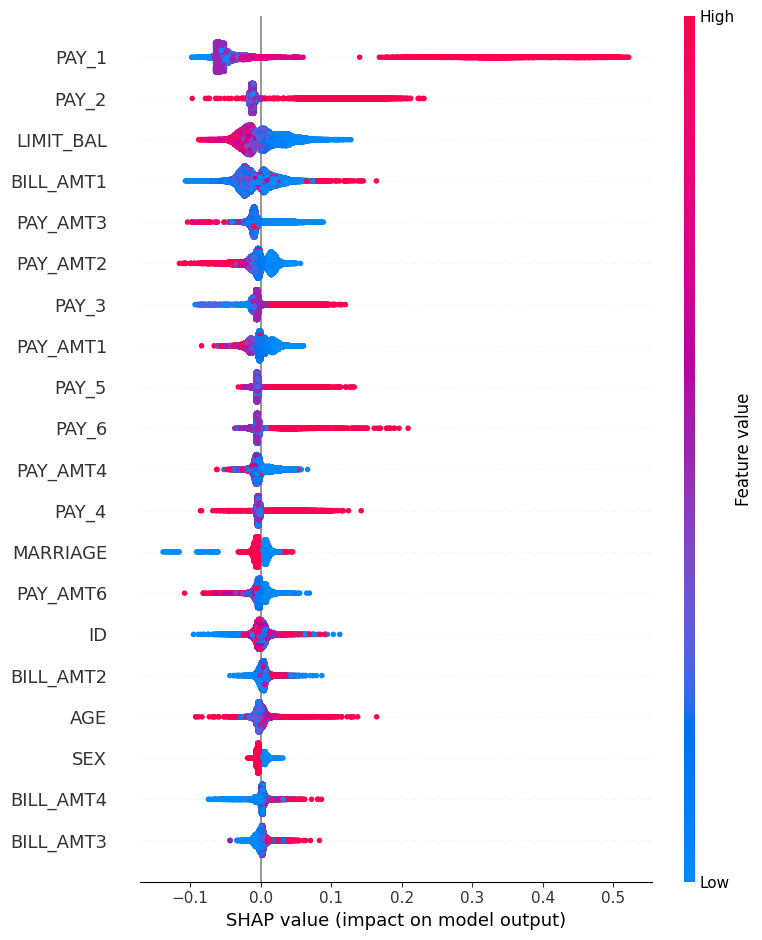

In [12]:
import pandas as pd
import lightgbm as lgbm
import shap

# Prepare the feature matrix df_X and the target variable df_y based on your dataset
df_X = defaulters.drop('def_pay', axis=1)
df_y = defaulters['def_pay']

# Create the LightGBM regressor model
model_lgbm = lgbm.LGBMRegressor()

# Fit the model on the training data
model_lgbm.fit(df_X, df_y)

# Create the SHAP explainer
explainer = shap.Explainer(model_lgbm)

# Compute SHAP values
shap_values = explainer.shap_values(df_X)

# Summarize the feature importance
shap.summary_plot(shap_values, df_X, show=False)


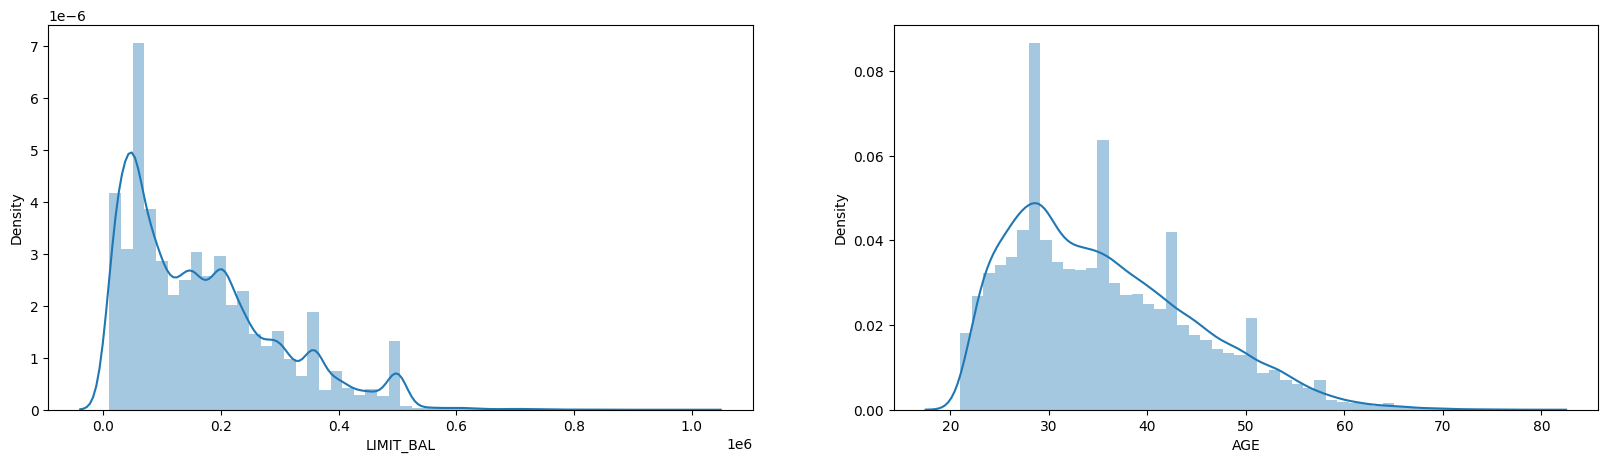

In [13]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

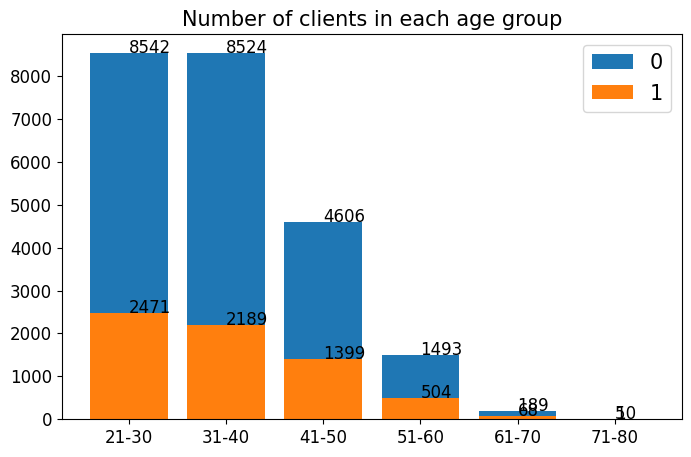

In [14]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

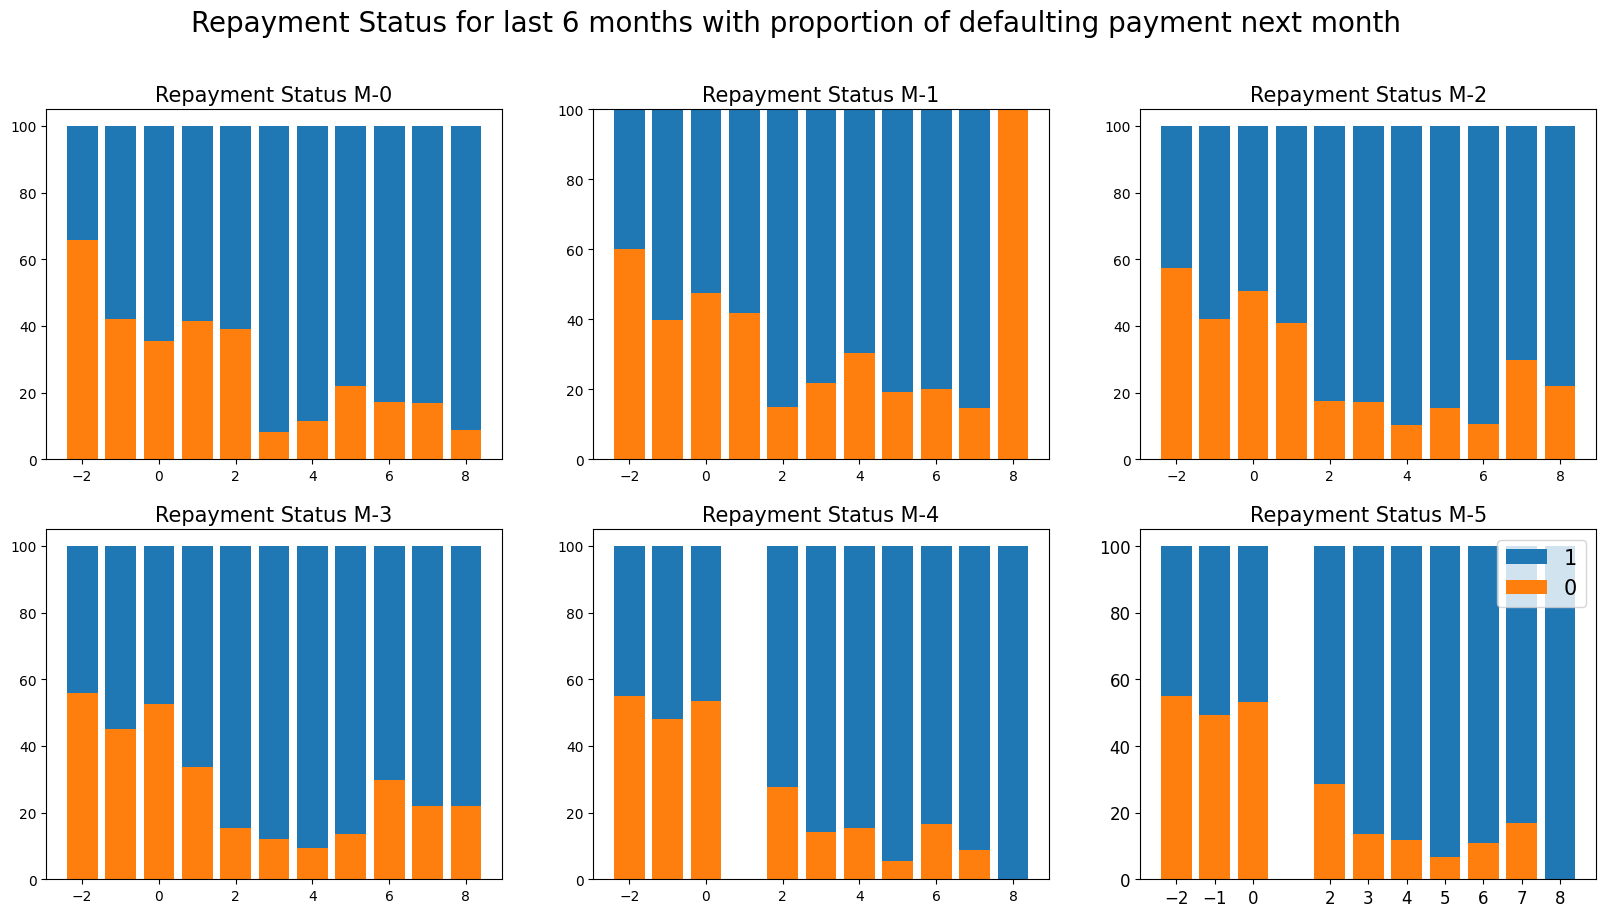

In [15]:
plt.subplots(figsize=(20,10))

ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

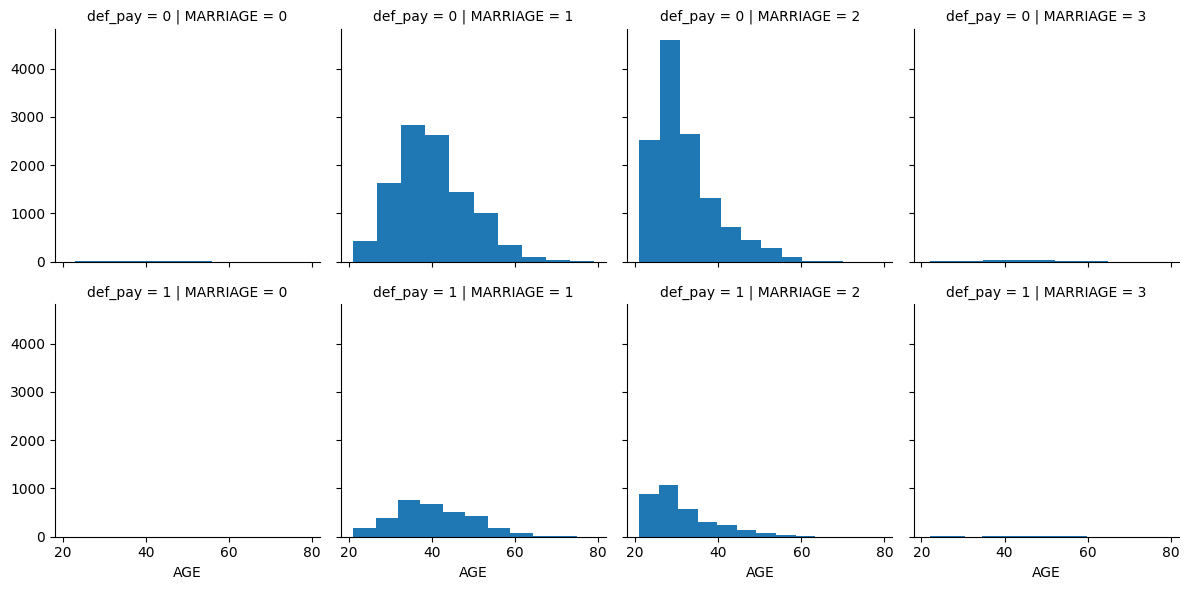

In [16]:
g = sns.FacetGrid(defaulters, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

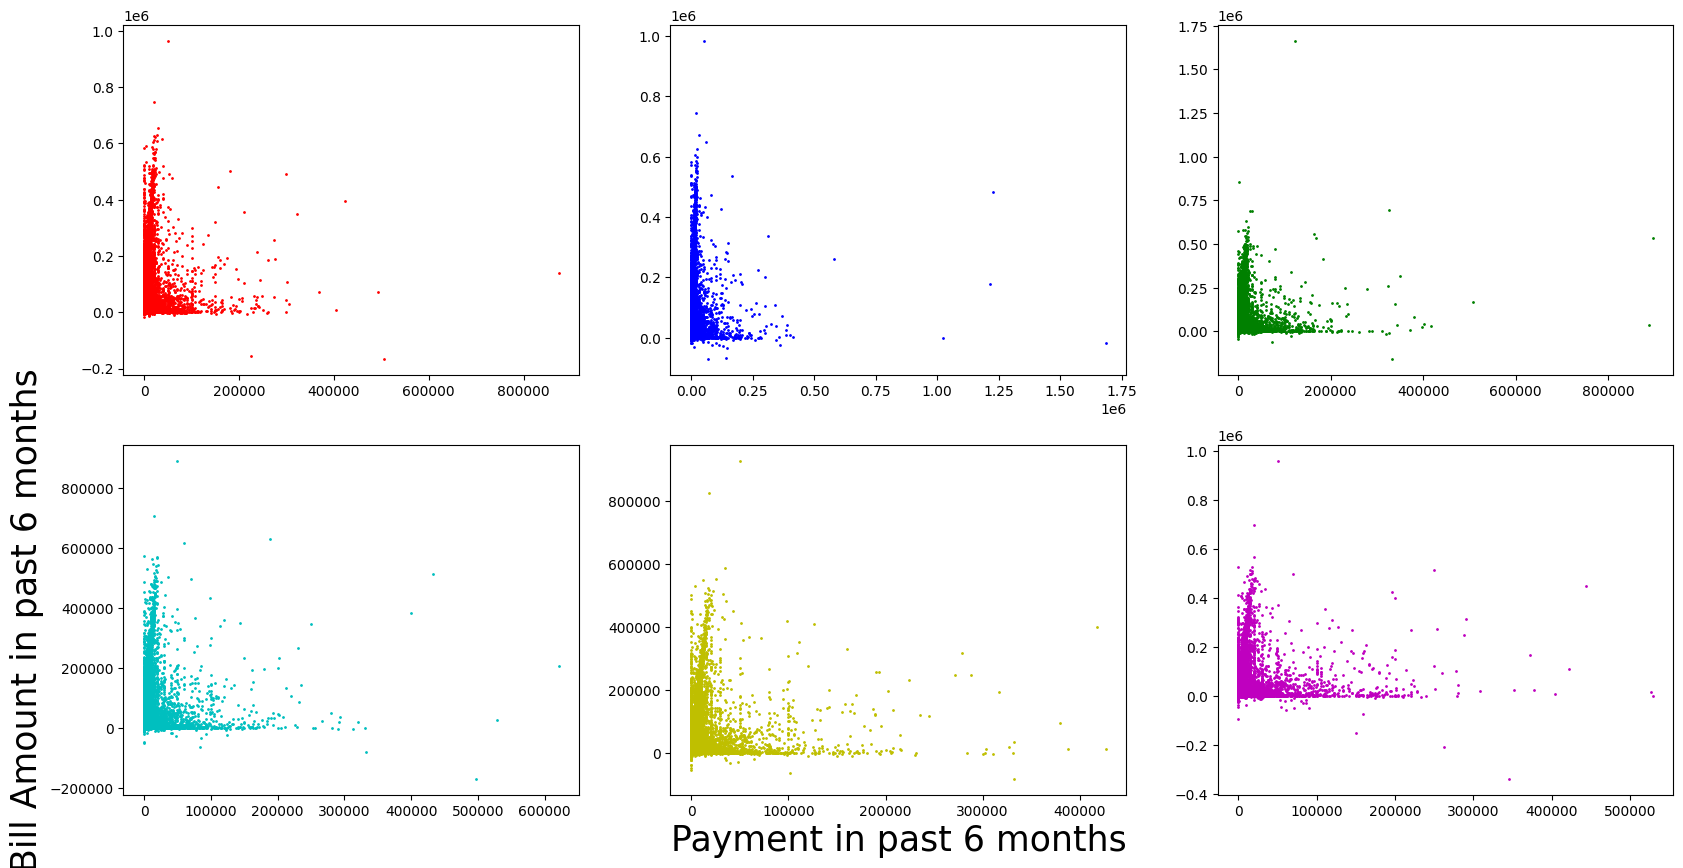

In [17]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()

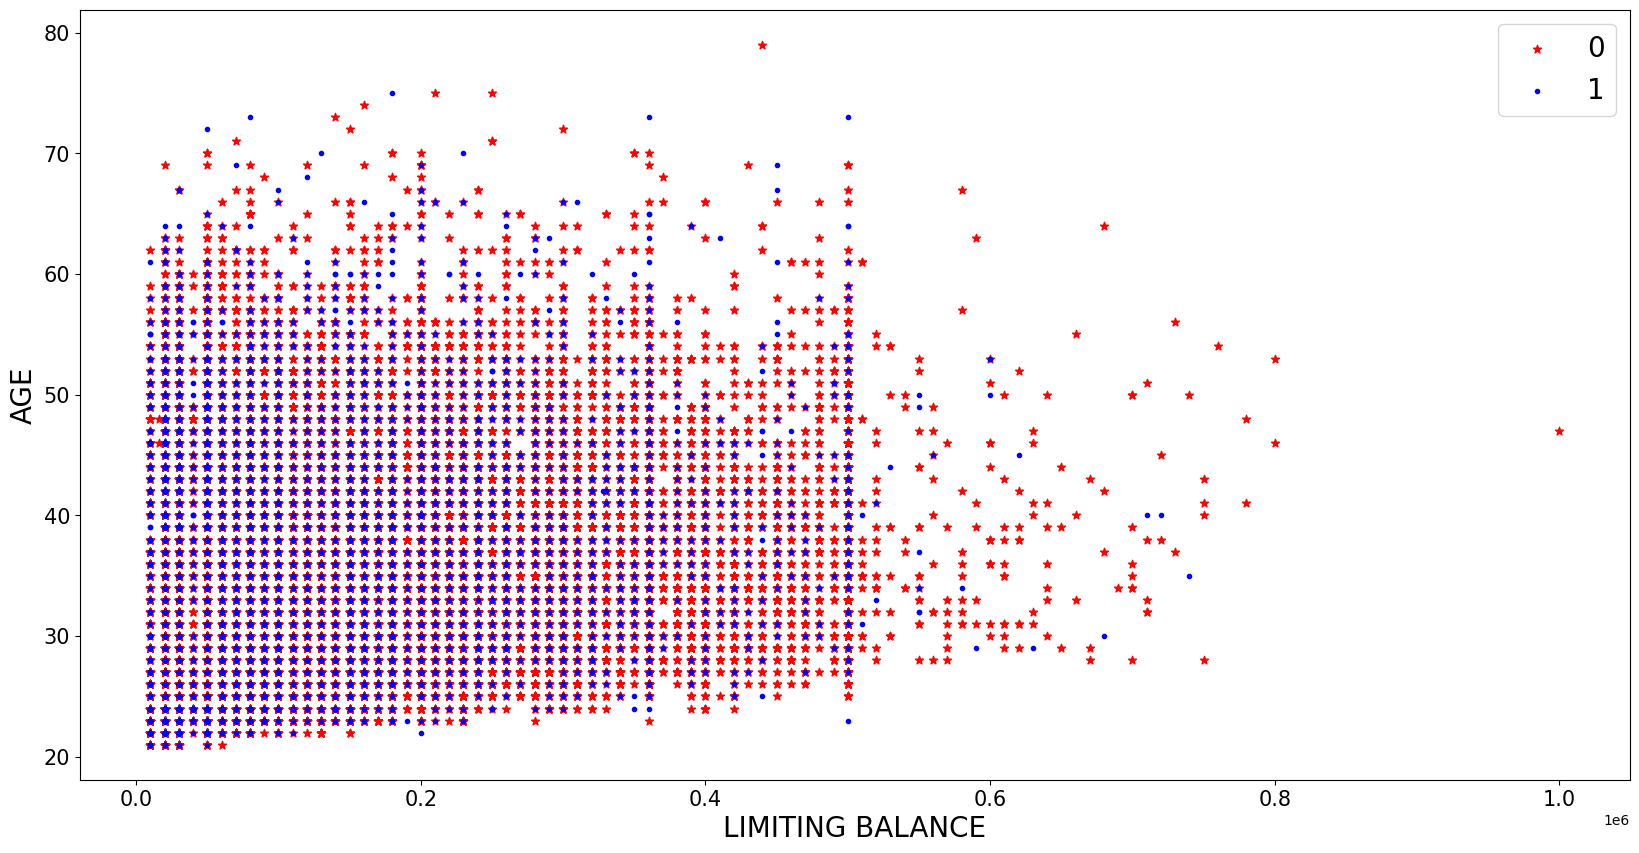

In [18]:
y1 = defaulters.AGE[defaulters["def_pay"] == 0]
y2 = defaulters.AGE[defaulters["def_pay"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()

#Training models


In [21]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


In [22]:
defaulters.SEX = defaulters.SEX.astype("category")
defaulters.EDUCATION = defaulters.EDUCATION.astype("category")
defaulters.MARRIAGE = defaulters.MARRIAGE.astype("category")
defaulters.PAY_1 = defaulters.PAY_1.astype("category")
defaulters.PAY_2 = defaulters.PAY_2.astype("category")
defaulters.PAY_3 = defaulters.PAY_3.astype("category")
defaulters.PAY_4 = defaulters.PAY_4.astype("category")
defaulters.PAY_5 = defaulters.PAY_5.astype("category")
defaulters.PAY_6 = defaulters.PAY_6.astype("category")
defaulters.def_type = defaulters.def_pay.astype("category")

In [23]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model2:  0.7801666666666667


In [24]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model3:  0.7801666666666667


In [25]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.78      0.88      3000

[[2334  666]
 [   0    0]]

Test Accuracy Score for model4:  0.778

Train Accuracy Score for model4:  0.7788518518518519


In [26]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8591
           1       0.15      0.73      0.25       409

    accuracy                           0.80      9000
   macro avg       0.57      0.76      0.57      9000
weighted avg       0.95      0.80      0.85      9000

[[6891 1700]
 [ 112  297]]

Test Accuracy Score for model5:  0.7986666666666666

Train Accuracy Score for model5:  0.7987142857142857


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Prepare the feature matrix df_X and the target variable df_y based on your dataset
df_X = defaulters[['SEX', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'EDUCATION', 'PAY_1']]
df_y = defaulters.def_pay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

# Train and evaluate the RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_train_pred_rf = model_rf.predict(X_train)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred_rf))
print()

# Train and evaluate the SVC (Support Vector Classifier)
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
y_train_pred_svc = model_svc.predict(X_train)

print("Support Vector Classifier:")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred_svc))
print()

# Train and evaluate the KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
y_train_pred_knn = model_knn.predict(X_train)

print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred_knn))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7003
           1       0.48      0.36      0.41      1997

    accuracy                           0.77      9000
   macro avg       0.66      0.63      0.64      9000
weighted avg       0.75      0.77      0.76      9000

[[6224  779]
 [1273  724]]
Test Accuracy Score: 0.772
Train Accuracy Score: 0.9861904761904762

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7003
           1       0.00      0.00      0.00      1997

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

[[7003    0]
 [1997    0]]
Test Accuracy Score: 0.7781111111111111
Train Accuracy Score: 0.7790952380952381

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Convert categorical columns to one-hot encoding
df_X_encoded = pd.get_dummies(defaulters[['SEX', 'MARRIAGE', 'EDUCATION', 'PAY_1']], drop_first=True)
df_X = pd.concat([df_X_encoded, defaulters[['AGE', 'BILL_AMT1']]], axis=1)
df_y = defaulters.def_pay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

# Train and evaluate the XGBoost classifier
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_train_pred_xgb = model_xgb.predict(X_train)

print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred_xgb))


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7003
           1       0.66      0.34      0.45      1997

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.81      0.79      9000

[[6663  340]
 [1328  669]]
Test Accuracy Score: 0.8146666666666667
Train Accuracy Score: 0.8444761904761905


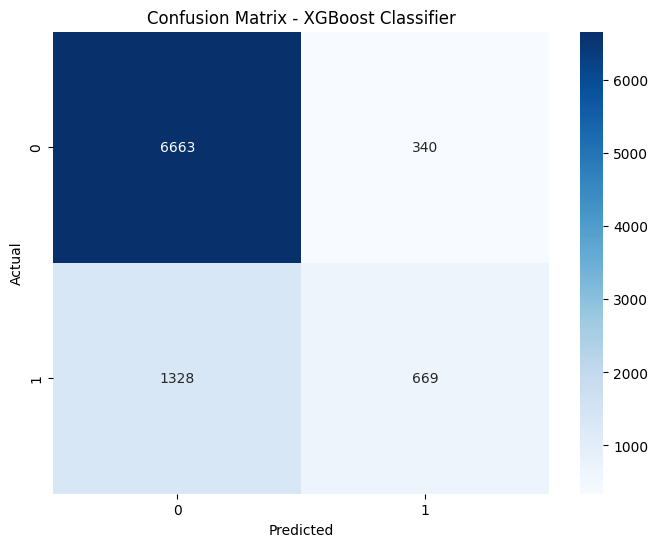

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_xgb)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Prepare the feature matrix df_X and the target variable df_y based on your dataset
df_X = defaulters[['SEX', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'EDUCATION', 'PAY_1']]
df_y = defaulters.def_pay

# Perform one-hot encoding on the categorical columns
df_X_encoded = pd.get_dummies(df_X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X_encoded, df_y, test_size=0.3, random_state=20)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate the XGBoost classifier
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = model_xgb.predict(X_test)
y_train_pred_xgb = model_xgb.predict(X_train_smote)

print("XGBoost Classifier with SMOTE and One-Hot Encoding:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("Train Accuracy Score:", accuracy_score(y_train_smote, y_train_pred_xgb))


XGBoost Classifier with SMOTE and One-Hot Encoding:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7003
           1       0.55      0.40      0.46      1997

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.67      9000
weighted avg       0.78      0.79      0.78      9000

[[6350  653]
 [1204  793]]
Test Accuracy Score: 0.7936666666666666
Train Accuracy Score: 0.8687121814070045


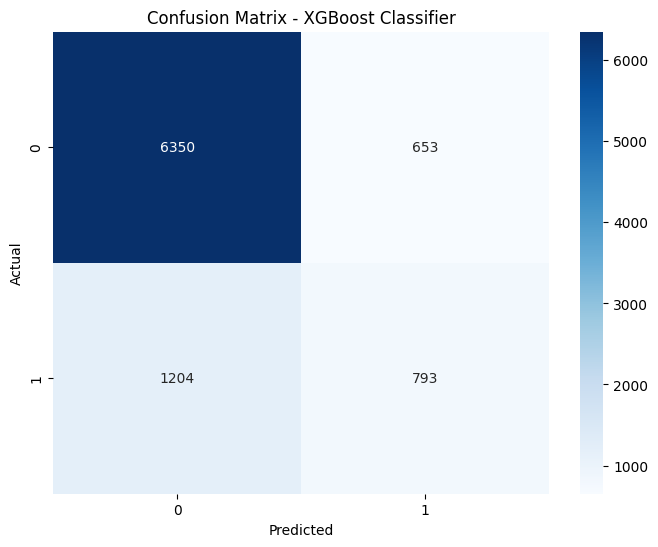

In [31]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_xgb)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Prepare the feature matrix df_X and the target variable df_y based on your dataset
df_X = defaulters[['SEX', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'EDUCATION', 'PAY_1']]
df_y = defaulters.def_pay

# Perform one-hot encoding on the categorical columns
df_X_encoded = pd.get_dummies(df_X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X_encoded, df_y, test_size=0.3, random_state=20)

best_accuracy = 0.0
best_random_state = None

# Iterate through 100 random states
for random_state in range(1, 101):
    # Apply SMOTE to oversample the minority class
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train and evaluate the XGBoost classifier
    model_xgb = xgb.XGBClassifier()
    model_xgb.fit(X_train_smote, y_train_smote)
    y_pred_xgb = model_xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)

    # Update the best accuracy and random state if a higher accuracy is achieved
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

# Output the best accuracy and random state
print("Best Random State:", best_random_state)
print("Best Accuracy:", best_accuracy)


Best Random State: 24
Best Accuracy: 0.7998888888888889


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the feature matrix df_X and the target variable df_y based on your dataset
df_X = defaulters[['SEX', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'EDUCATION', 'PAY_1']]
df_y = defaulters.def_pay

# Perform one-hot encoding on the categorical columns
df_X_encoded = pd.get_dummies(df_X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X_encoded, df_y, test_size=0.3, random_state=20)

# Train and evaluate the SVM classifier
model_svm = SVC(gamma='auto')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
y_train_pred_svm = model_svm.predict(X_train)

print("SVM Classifier without SMOTE and with One-Hot Encoding:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred_svm))


SVM Classifier without SMOTE and with One-Hot Encoding:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7003
           1       0.46      0.03      0.06      1997

    accuracy                           0.78      9000
   macro avg       0.62      0.51      0.47      9000
weighted avg       0.71      0.78      0.69      9000

[[6922   81]
 [1929   68]]
Test Accuracy Score: 0.7766666666666666
Train Accuracy Score: 0.9290952380952381


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the feature matrix df_X and the target variable df_y based on your dataset
df_X = defaulters[['SEX', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'EDUCATION', 'PAY_1']]
df_y = defaulters.def_pay

# Perform one-hot encoding on the categorical columns
df_X_encoded = pd.get_dummies(df_X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X_encoded, df_y, test_size=0.3, random_state=20)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate the SVM classifier
model_svm = SVC(gamma='auto')
model_svm.fit(X_train_smote, y_train_smote)
y_pred_svm = model_svm.predict(X_test)
y_train_pred_svm = model_svm.predict(X_train_smote)

print("SVM Classifier with SMOTE and One-Hot Encoding:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Train Accuracy Score:", accuracy_score(y_train_smote, y_train_pred_svm))


SVM Classifier with SMOTE and One-Hot Encoding:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      7003
           1       0.25      0.25      0.25      1997

    accuracy                           0.67      9000
   macro avg       0.52      0.52      0.52      9000
weighted avg       0.67      0.67      0.67      9000

[[5536 1467]
 [1500  497]]
Test Accuracy Score: 0.6703333333333333
Train Accuracy Score: 0.9387567997066194
